In [10]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

# Load the dataset into a Pandas dataframe
df = pd.read_csv("titanic.csv")

In [6]:
df


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [46]:
df.dtypes

survived         int64
pclass           int64
sex             object
age            float64
sibsp            int64
parch            int64
fare           float64
embarked        object
class           object
who             object
adult_male        bool
deck            object
embark_town     object
alive           object
alone             bool
dtype: object

In [23]:
df.shape

(891, 15)

In [24]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB
None


In [25]:
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [9]:
df[["survived","pclass","age","sibsp","parch"]].describe()

,survived,pclass,age,sibsp,parch
count,891.000000,891.000000,714.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594
std,0.486592,0.836071,14.526497,1.102743,0.806057
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000


In [47]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


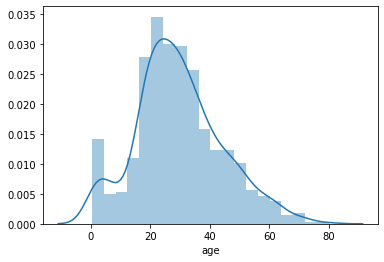

In [19]:
sns.distplot(df.age,kde=True)

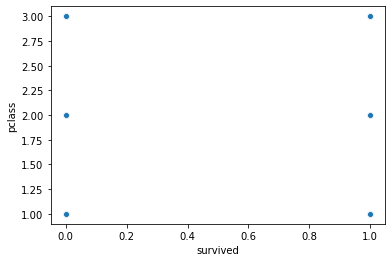

In [26]:
sns.scatterplot(df.survived,df.pclass)

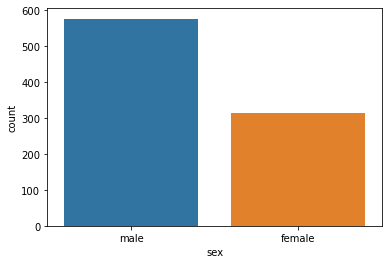

In [28]:
sns.countplot(df.sex)

In [29]:
df[["survived","pclass","age","sibsp","parch"]].corr()

,survived,pclass,age,sibsp,parch
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838
parch,0.081629,0.018443,-0.189119,0.414838,1.000000


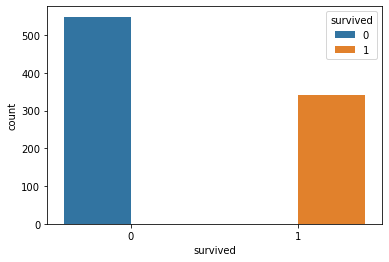

In [31]:
sns.countplot(data=df,x="survived",hue="survived")

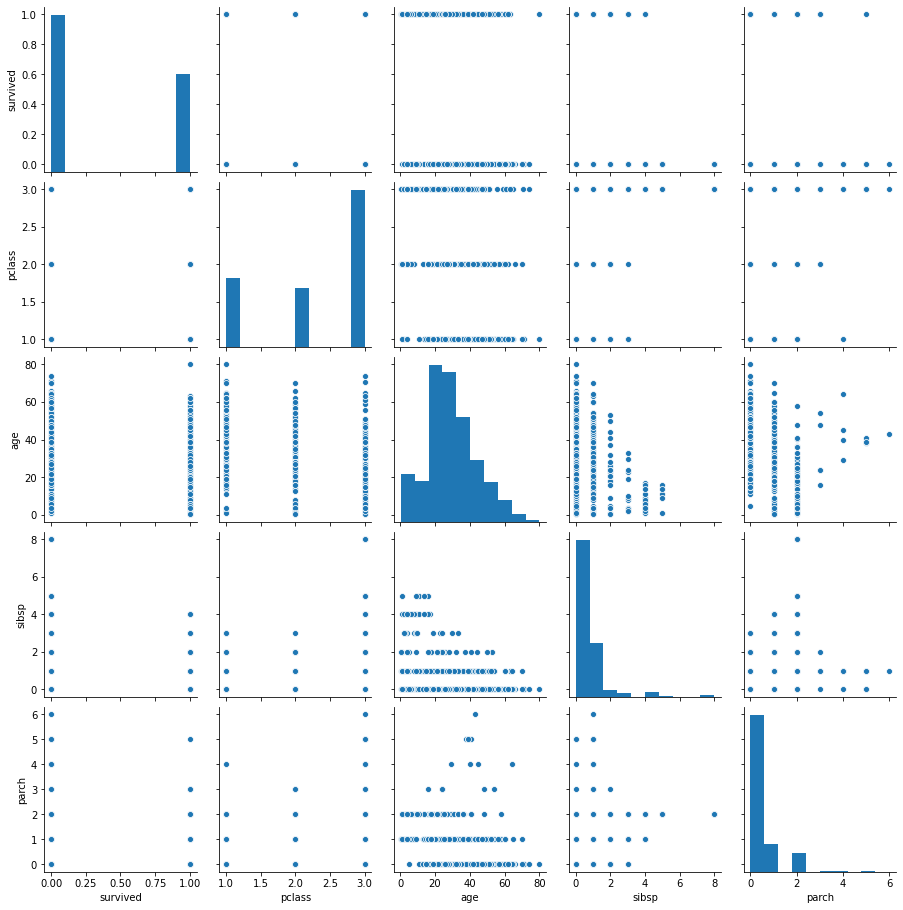

In [32]:
sns.pairplot(data=df[["survived","pclass","age","sibsp","parch"]])

# Statistics

In [33]:
df.mean()

survived       0.383838
pclass         2.308642
age           29.699118
sibsp          0.523008
parch          0.381594
fare          32.204208
adult_male     0.602694
alone          0.602694
dtype: float64

In [34]:
df.median()

survived       0.0000
pclass         3.0000
age           28.0000
sibsp          0.0000
parch          0.0000
fare          14.4542
adult_male     1.0000
alone          1.0000
dtype: float64

In [35]:
df.mode()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,24.0,0,0,8.05,S,Third,man,True,C,Southampton,no,True


In [36]:
df.skew()

survived      0.478523
pclass       -0.630548
age           0.389108
sibsp         3.695352
parch         2.749117
fare          4.787317
adult_male   -0.420431
alone        -0.420431
dtype: float64

AxesSubplot(0.125,0.125;0.775x0.755)


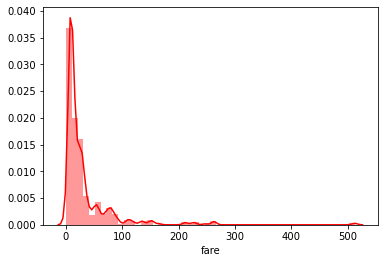

In [37]:
print(sns.distplot(df['fare'],color='red'))

In [38]:
df.kurt()

survived      -1.775005
pclass        -1.280015
age            0.178274
sibsp         17.880420
parch          9.778125
fare          33.398141
adult_male    -1.827345
alone         -1.827345
dtype: float64

In [39]:
df.min()

survived           0
pclass             1
sex           female
age             0.42
sibsp              0
parch              0
fare               0
class          First
who            child
adult_male     False
alive             no
alone          False
dtype: object

In [40]:
df.max()

survived            1
pclass              3
sex              male
age                80
sibsp               8
parch               6
fare          512.329
class           Third
who             woman
adult_male       True
alive             yes
alone            True
dtype: object

# Missing Value


In [41]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [42]:
df.notnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True
887,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
888,True,True,True,False,True,True,True,True,True,True,True,False,True,True,True
889,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [44]:
# filling a null values using fillna() 
df["sex"].fillna("No Gender", inplace = True) 
  
df["sex"]

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: sex, Length: 891, dtype: object

In [48]:
missing_values=df.isnull().sum()
missing_values[missing_values>0]/len(df)*100

age            19.865320
embarked        0.224467
deck           77.216611
embark_town     0.224467
dtype: float64

In [50]:
df['age']=df['age'].fillna(df['age'].mode()[0])
df['embarked']=df['embarked'].fillna(df['embarked'].mode()[0])

In [51]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [54]:
df['deck']=df['deck'].fillna(df['deck'].mode()[0])
df['embark_town']=df['embark_town'].fillna(df['embark_town'].mode()[0])

In [55]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

# Outliers Identification

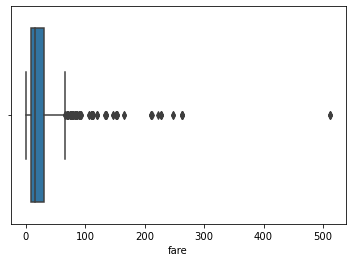

In [56]:
##boxplot
sns.boxplot(df['fare'],data=df)

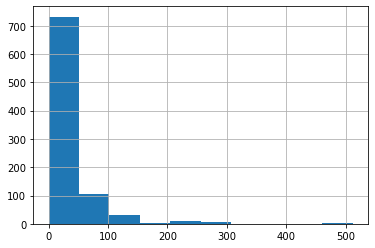

In [57]:
##histogram
df['fare'].hist()

In [58]:
print('skewness value of Age: ',df['age'].skew())
print('skewness value of Fare: ',df['fare'].skew())

skewness value of Age:  0.6577529069911331
skewness value of Fare:  4.787316519674893


Interquartile Range(IQR)

In [62]:
Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
Fare_outliers = df[(df['fare'] < Q1 - whisker_width*IQR) | (df['fare'] > Q3 + whisker_width*IQR)]
Fare_outliers.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
27,0,1,male,19.0,3,2,263.0000,S,First,man,True,C,Southampton,no,False
31,1,1,female,24.0,1,0,146.5208,C,First,woman,False,B,Cherbourg,yes,False
34,0,1,male,28.0,1,0,82.1708,C,First,man,True,C,Cherbourg,no,False
52,1,1,female,49.0,1,0,76.7292,C,First,woman,False,D,Cherbourg,yes,False


In [63]:
fare_mean = df['fare'].mean()
fare_std = df['fare'].std()
low= fare_mean -(3 * fare_std)
high= fare_mean + (3 * fare_std)
fare_outliers = df[(df['fare'] < low) | (df['fare'] > high)]
fare_outliers.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
27,0,1,male,19.0,3,2,263.0000,S,First,man,True,C,Southampton,no,False
88,1,1,female,23.0,3,2,263.0000,S,First,woman,False,C,Southampton,yes,False
118,0,1,male,24.0,0,1,247.5208,C,First,man,True,B,Cherbourg,no,False
258,1,1,female,35.0,0,0,512.3292,C,First,woman,False,C,Cherbourg,yes,True
299,1,1,female,50.0,0,1,247.5208,C,First,woman,False,B,Cherbourg,yes,False


In [66]:
Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
df['fare']=np.where(df['fare']>upper_whisker,upper_whisker,np.where(df['fare']<lower_whisker,lower_whisker,df['fare']))

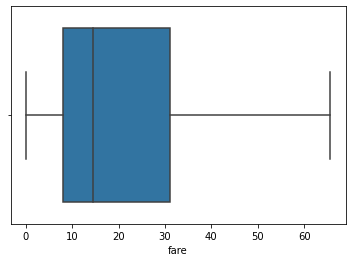

In [67]:
sns.boxplot(df['fare'],data=df)

In [70]:
columns = ['pclass', 'sex', 'sibsp', 'parch', 'embarked']

for column in columns:
    print(column)
    print(df[column].unique())
    print(df[column].unique())

pclass
[3 1 2]
[3 1 2]
sex
['male' 'female']
['male' 'female']
sibsp
[1 0 3 4 2 5 8]
[1 0 3 4 2 5 8]
parch
[0 1 2 5 3 4 6]
[0 1 2 5 3 4 6]
embarked
['S' 'C' 'Q']
['S' 'C' 'Q']


In [73]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

columns = ['pclass', 'sex', 'sibsp', 'parch', 'embarked']

for col in columns:
    le.fit(df[col])
    df[col] = le.transform(df[col])
    
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,2,1,22.0,1,0,7.2500,2,Third,man,True,C,Southampton,no,False
1,1,0,0,38.0,1,0,65.6344,0,First,woman,False,C,Cherbourg,yes,False
2,1,2,0,26.0,0,0,7.9250,2,Third,woman,False,C,Southampton,yes,True
3,1,0,0,35.0,1,0,53.1000,2,First,woman,False,C,Southampton,yes,False
4,0,2,1,35.0,0,0,8.0500,2,Third,man,True,C,Southampton,no,True


# Split the data into dependent and independent variables.

In [74]:
X = df.iloc[:, :-1].values
print(X)

[[0 2 1 ... 'C' 'Southampton' 'no']
 [1 0 0 ... 'C' 'Cherbourg' 'yes']
 [1 2 0 ... 'C' 'Southampton' 'yes']
 ...
 [0 2 0 ... 'C' 'Southampton' 'no']
 [1 0 1 ... 'C' 'Cherbourg' 'yes']
 [0 2 1 ... 'C' 'Queenstown' 'no']]


In [75]:
Y = df.iloc[:, -1].values
print(Y)

[False False  True False  True  True  True False False False False  True
  True False  True  True False  True False  True  True  True  True  True
 False False  True False  True  True  True False  True  True False False
  True  True False False False False  True False  True  True False  True
 False False False  True False False False  True  True  True False False
  True  True False False  True False  True  True False False  True False
  True False  True  True  True  True False  True  True  True  True  True
  True False False  True False  True  True  True False False  True  True
  True False False False  True  True False  True False  True  True  True
  True False  True False  True False  True  True  True False False False
 False  True False  True False False  True  True False  True  True  True
 False False  True  True False False  True  True False  True False  True
  True False  True False False  True  True False  True False  True False
  True  True  True False False  True  True  True Fa

# Split the data into training and testing

In [76]:

from sklearn.model_selection import train_test_split
titanic = pd.read_csv('titanic.csv')
 
features = titanic.drop('survived', axis=1)
labels = titanic['survived']
print(features)
print(labels)
 
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=42)
# 60% of  full data = train set
# 40% of full data = test set
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
# 50% of test data = test set ( which is equal to 20% of full data)
# 50% of test data = validation set ( which is equal to 20% of full data)
for dataset in [y_train, y_val, y_test]:
    print(round(len(dataset) / len(labels), 2))
 
## Write out all data
X_train.to_csv('train_features.csv', index=False)
X_val.to_csv('val_features.csv', index=False)
X_test.to_csv('test_features.csv', index=False)
 
y_train.to_csv('train_labels.csv', index=False, header=False)
y_val.to_csv('val_labels.csv', index=False, header=False)
y_test.to_csv('test_labels.csv', index=False, header=False)

     pclass     sex   age  sibsp  parch     fare embarked   class    who  \
0         3    male  22.0      1      0   7.2500        S   Third    man   
1         1  female  38.0      1      0  71.2833        C   First  woman   
2         3  female  26.0      0      0   7.9250        S   Third  woman   
3         1  female  35.0      1      0  53.1000        S   First  woman   
4         3    male  35.0      0      0   8.0500        S   Third    man   
..      ...     ...   ...    ...    ...      ...      ...     ...    ...   
886       2    male  27.0      0      0  13.0000        S  Second    man   
887       1  female  19.0      0      0  30.0000        S   First  woman   
888       3  female   NaN      1      2  23.4500        S   Third  woman   
889       1    male  26.0      0      0  30.0000        C   First    man   
890       3    male  32.0      0      0   7.7500        Q   Third    man   

     adult_male deck  embark_town alive  alone  
0          True  NaN  Southampton    n